In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import gutenberg, stopwords
from collections import Counter
import nltk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc 
from sklearn.metrics import classification_report

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.base import clone

#import warnings filter - ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# Loading data

In [2]:
#listing books to choose from
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
# Load the data.
austen = gutenberg.raw('austen-emma.txt')
bryant = gutenberg.raw('bryant-stories.txt')
burgess = gutenberg.raw('burgess-busterbrown.txt')
carroll = gutenberg.raw('carroll-alice.txt')
chesterton = gutenberg.raw('chesterton-ball.txt')
edgeworth = gutenberg.raw('edgeworth-parents.txt')
melville = gutenberg.raw('melville-moby_dick.txt')
milton = gutenberg.raw('milton-paradise.txt')
shakespeare = gutenberg.raw('shakespeare-caesar.txt')
whitman = gutenberg.raw('whitman-leaves.txt')

In [4]:
#seeing the length of each book
print("{:,}".format(len(austen)))
print("{:,}".format(len(bryant)))
print("{:,}".format(len(burgess)))
print("{:,}".format(len(carroll)))
print("{:,}".format(len(chesterton)))
print("{:,}".format(len(edgeworth)))
print("{:,}".format(len(melville)))
print("{:,}".format(len(milton)))
print("{:,}".format(len(shakespeare)))
print("{:,}".format(len(whitman)))

887,071
249,439
84,663
144,395
457,450
935,158
1,242,990
468,220
112,310
711,215


# Cleaning  data

In [5]:
#limiting text to 50%

len_percent = 0.5

austen_len = int(len(austen) * len_percent)
bryant_len = int(len(bryant) * len_percent)
burgess_len = int(len(burgess) * len_percent)
carroll_len = int(len(carroll) * len_percent)
chesterton_len = int(len(chesterton) * len_percent)
edgeworth_len = int(len(edgeworth) * len_percent)
melville_len = int(len(melville) * len_percent)
milton_len = int(len(milton) * len_percent)
shakespeare_len = int(len(shakespeare) * len_percent)
whitman_len = int(len(whitman) * len_percent)

austen = austen[:austen_len]
bryant = bryant[:bryant_len]
burgess = burgess[:burgess_len]
carroll = carroll[:carroll_len]
chesterton = chesterton[:chesterton_len]
edgeworth = edgeworth[:edgeworth_len]
melville = melville[:melville_len]
milton = milton[:milton_len]
shakespeare = shakespeare[:shakespeare_len]
whitman = whitman[:whitman_len]

In [6]:
# Check - Print the first 1000 characters
#austen[0:1000]
#bryant[0:1000]
#burgess[0:1000]
#carroll[0:1000]
#chesterton[0:1000]
#edgeworth[0:1000]
#melville[0:1000]
#milton[0:1000]
#shakespeare[0:1000]
#whitman[0:1000]

In [7]:
# Function for text cleaning.
def text_cleaner(text):
    text = re.sub('--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = re.sub('\'','', text)
    text = re.sub('`','', text)
    text = re.sub('_','', text)
    text = ' '.join(text.split())
    return text

In [8]:
#applying text cleaning function
austen = text_cleaner(austen)
bryant = text_cleaner(bryant)
burgess = text_cleaner(burgess)
carroll = text_cleaner(carroll)
chesterton = text_cleaner(chesterton)
edgeworth = text_cleaner(edgeworth)
melville = text_cleaner(melville)
milton = text_cleaner(milton)
shakespeare = text_cleaner(shakespeare)
whitman = text_cleaner(whitman)

In [9]:
#check 

#austen
#bryant
#burgess
#carroll
#chesterton
#edgeworth
#melville
#milton
#shakespeare
#whitman

In [10]:
#parsing 
nlp = spacy.load('en')

austen_doc = nlp(austen)
bryant_doc = nlp(bryant)
burgess_doc = nlp(burgess)
carroll_doc = nlp(carroll)
chesterton_doc = nlp(chesterton)
edgeworth_doc = nlp(edgeworth)
melville_doc = nlp(melville)
milton_doc = nlp(milton)
shakespeare_doc = nlp(shakespeare)
whitman_doc = nlp(whitman)

In [11]:
#Check
#austen_doc
#bryant_doc
#burgess_doc
#carroll_doc
#chesterton_doc
#edgeworth_doc
#melville_doc
#milton_doc
#shakespeare_doc
#whitman_doc

In [12]:
# Group into sentences.
austen_sents = [str(sent) for sent in austen_doc.sents]
bryant_sents = [str(sent) for sent in bryant_doc.sents]
burgess_sents = [str(sent) for sent in burgess_doc.sents]
carroll_sents = [str(sent) for sent in carroll_doc.sents]
chesterton_sents = [str(sent) for sent in chesterton_doc.sents]
edgeworth_sents = [str(sent) for sent in edgeworth_doc.sents]
melville_sents = [str(sent) for sent in melville_doc.sents]
milton_sents = [str(sent) for sent in milton_doc.sents]
shakespeare_sents = [str(sent) for sent in shakespeare_doc.sents]
whitman_sents = [str(sent) for sent in whitman_doc.sents]

In [13]:
# #Check
#austen_sents
#bryant_sents
#burgess_sents
#carroll_sents
#chesterton_sents
#edgeworth_sents
#melville_sents
#milton_sents
#shakespeare_sents
#whitman_sents

In [14]:
# #Check
# print(len(austen_sents))
# print(len(bryant_sents))
# print(len(burgess_sents))
# print(len(carroll_sents))
# print(len(chesterton_sents))
# print(len(edgeworth_sents))
# print(len(melville_sents))
# print(len(milton_sents))
# print(len(shakespeare_sents))
# print(len(whitman_sents))

# Feature Creation - TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(#max_df=.5, 
                             #min_df=2, 
                             max_features = 10,
                             stop_words='english', 
                             lowercase=True, 
                             use_idf=True,
                             norm=u'l2', 
                             smooth_idf=True 
                            )

In [16]:
austen_tfidf = vectorizer.fit_transform(austen_sents)

austen_feature_names = vectorizer.get_feature_names()

dense = austen_tfidf.todense()
denselist = dense.tolist()

df_austen = pd.DataFrame(denselist, columns=austen_feature_names)

In [17]:
bryant_tfidf = vectorizer.fit_transform(bryant_sents)

bryant_feature_names = vectorizer.get_feature_names()

dense = bryant_tfidf.todense()
denselist = dense.tolist()

df_bryant = pd.DataFrame(denselist, columns=bryant_feature_names)

In [18]:
burgess_tfidf = vectorizer.fit_transform(burgess_sents)

burgess_feature_names = vectorizer.get_feature_names()

dense = burgess_tfidf.todense()
denselist = dense.tolist()

df_burgess = pd.DataFrame(denselist, columns=burgess_feature_names)

In [19]:
carroll_tfidf = vectorizer.fit_transform(carroll_sents)

carroll_feature_names = vectorizer.get_feature_names()

dense = carroll_tfidf.todense()
denselist = dense.tolist()

df_carroll = pd.DataFrame(denselist, columns=carroll_feature_names)

In [20]:
chesterton_tfidf = vectorizer.fit_transform(chesterton_sents)

chesterton_feature_names = vectorizer.get_feature_names()

dense = chesterton_tfidf.todense()
denselist = dense.tolist()

df_chesterton = pd.DataFrame(denselist, columns=chesterton_feature_names)

In [21]:
edgeworth_tfidf = vectorizer.fit_transform(edgeworth_sents)

edgeworth_feature_names = vectorizer.get_feature_names()

dense = edgeworth_tfidf.todense()
denselist = dense.tolist()

df_edgeworth = pd.DataFrame(denselist, columns=edgeworth_feature_names)

In [22]:
melville_tfidf = vectorizer.fit_transform(melville_sents)

melville_feature_names = vectorizer.get_feature_names()

dense = melville_tfidf.todense()
denselist = dense.tolist()

df_melville = pd.DataFrame(denselist, columns=melville_feature_names)

In [23]:
milton_tfidf = vectorizer.fit_transform(milton_sents)

milton_feature_names = vectorizer.get_feature_names()

dense = milton_tfidf.todense()
denselist = dense.tolist()

df_milton = pd.DataFrame(denselist, columns=milton_feature_names)

In [24]:
shakespeare_tfidf = vectorizer.fit_transform(shakespeare_sents)

shakespeare_feature_names = vectorizer.get_feature_names()

dense = shakespeare_tfidf.todense()
denselist = dense.tolist()

df_shakespeare = pd.DataFrame(denselist, columns=shakespeare_feature_names)

In [25]:
whitman_tfidf = vectorizer.fit_transform(whitman_sents)

whitman_feature_names = vectorizer.get_feature_names()

dense = whitman_tfidf.todense()
denselist = dense.tolist()

df_whitman = pd.DataFrame(denselist, columns=whitman_feature_names)

In [26]:
# #check
# df_austen
# df_bryant
# df_burgess
# df_carroll
# df_chesterton
# df_edgeworth
# df_melville
# df_milton
# df_shakespeare
# df_whitman

In [27]:
# #check
# print(df_austen.shape)
# print(df_bryant.shape)
# print(df_burgess.shape)
# print(df_carroll.shape)
# print(df_chesterton.shape)
# print(df_edgeworth.shape)
# print(df_melville.shape)
# print(df_milton.shape)
# print(df_shakespeare.shape)
# print(df_whitman.shape)

In [28]:
#Adding author column 
df_austen['text_source'] = "austen"
df_bryant['text_source'] = "bryant"
df_burgess['text_source'] = "burgess"
df_carroll['text_source'] = "carroll"
df_chesterton['text_source'] = "chesterton"
df_edgeworth['text_source'] = "edgeworth"
df_melville['text_source'] = "melville"
df_milton['text_source'] = "milton"
df_shakespeare['text_source'] = "shakespeare"
df_whitman['text_source'] = "whitman"

In [29]:
df_list = [
    df_austen,
    df_bryant,
    df_burgess,
    df_carroll,
    df_chesterton,
    df_edgeworth,
    df_melville,
    df_milton,
    df_shakespeare,
    df_whitman
]

In [30]:
# #check
# for dataframe in df_list:
#     print(dataframe.isna().sum())

In [31]:
#check
# for dataframe in df_list:
#     print(dataframe.shape)

In [32]:
# Iterating through all dataframs to add 'row_sum'
for dataframe in df_list:
    #creating column that summarizes each row of data
    dataframe['row_sum'] = dataframe.sum(axis=1)

In [33]:
#failed code - usuable code below

# def limit_largest(df):
#     #limiting data to the largest rows
#     df = df.nlargest(500, ['row_sum'])

# for dataframe in df_list:
#     #limiting data to the largest rows
#     dataframe = dataframe.nlargest(500, ['row_sum'])

In [34]:
n_limit = 40

df_austen = df_austen.nlargest(n_limit, ['row_sum'])
df_bryant = df_bryant.nlargest(n_limit, ['row_sum'])
df_burgess = df_burgess.nlargest(n_limit, ['row_sum'])
df_carroll = df_carroll.nlargest(n_limit, ['row_sum'])
df_chesterton = df_chesterton.nlargest(n_limit, ['row_sum'])
df_edgeworth = df_edgeworth.nlargest(n_limit, ['row_sum'])
df_melville = df_melville.nlargest(n_limit, ['row_sum'])
df_milton = df_milton.nlargest(n_limit, ['row_sum'])
df_shakespeare = df_shakespeare.nlargest(n_limit, ['row_sum'])
df_whitman = df_whitman.nlargest(n_limit, ['row_sum'])

In [35]:
df_list = [
    df_austen,
    df_bryant,
    df_burgess,
    df_carroll,
    df_chesterton,
    df_edgeworth,
    df_melville,
    df_milton,
    df_shakespeare,
    df_whitman
]

In [36]:
# #check
# for dataframe in df_list:
#     print(dataframe.shape)

In [37]:
#combining all datasets into one main dataset
df_tfidf = pd.concat([df_austen,
                      df_bryant,
                      df_burgess,
                      df_carroll,
                      df_chesterton,
                      df_edgeworth,
                      df_melville,
                      df_milton,
                      df_shakespeare,
                      df_whitman
                     ], sort=False)

In [38]:
#filling all the NaN values to 0
df_tfidf = df_tfidf.fillna(0)

In [39]:
##check
#df_tfidf.isna().sum()

In [40]:
#checking to see how dataset looks
# df_tfidf.describe()

In [41]:
#seeing the shape of the dataset
df_row = df_tfidf.shape[0]
df_col = df_tfidf.shape[1]

print("Row: {:,}".format(df_row))
print("Column: {:,}".format(df_col))

Row: 400
Column: 69


In [42]:
#calculating the number of 0s in the dataset
for column in df_tfidf.columns:
    col_0 = sum(df_tfidf[column] == 0)
    print("{}".format(column))
    print("Number of 0s in column: {:,}".format(col_0))
    print("Percentage of 0s in column: {:.2%}".format(col_0/df_row))

emma
Number of 0s in column: 383
Percentage of 0s in column: 95.75%
good
Number of 0s in column: 368
Percentage of 0s in column: 92.00%
harriet
Number of 0s in column: 386
Percentage of 0s in column: 96.50%
little
Number of 0s in column: 278
Percentage of 0s in column: 69.50%
miss
Number of 0s in column: 386
Percentage of 0s in column: 96.50%
mr
Number of 0s in column: 361
Percentage of 0s in column: 90.25%
mrs
Number of 0s in column: 384
Percentage of 0s in column: 96.00%
said
Number of 0s in column: 280
Percentage of 0s in column: 70.00%
thing
Number of 0s in column: 387
Percentage of 0s in column: 96.75%
think
Number of 0s in column: 379
Percentage of 0s in column: 94.75%
text_source
Number of 0s in column: 0
Percentage of 0s in column: 0.00%
row_sum
Number of 0s in column: 0
Percentage of 0s in column: 0.00%
away
Number of 0s in column: 391
Percentage of 0s in column: 97.75%
boy
Number of 0s in column: 376
Percentage of 0s in column: 94.00%
came
Number of 0s in column: 387
Percenta

In [43]:
# #creating column that summarizes each row of data
# df_tfidf['row_sum'] = df_tfidf.sum(axis=1)
# #limiting data to the largest rows
# df_tfidf = df_tfidf.nlargest(2000, ['row_sum'])

# df_tfidf.describe()

In [44]:
#check that all authors are still in dataset
df_tfidf.text_source.unique()

array(['austen', 'bryant', 'burgess', 'carroll', 'chesterton',
       'edgeworth', 'melville', 'milton', 'shakespeare', 'whitman'],
      dtype=object)

# Model Preprocessing

In [45]:
#creating x and y variables with training and test splits
x_tfidf = df_tfidf.drop(columns=['text_source'])
y_tfidf = df_tfidf['text_source']

x_tfidf_train, x_tfidf_test, y_train, y_test = train_test_split(
    x_tfidf, y_tfidf, test_size=0.25, random_state=1)

## Unsupervised Feature Generation

In [46]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Singular Value Decomposition (SVD) data reducer.
svd= TruncatedSVD(10)
lsa = make_pipeline(svd, Normalizer(copy=False))

# Run SVD on the training data
x_lsa_train = lsa.fit_transform(x_tfidf_train)
x_lsa_test = lsa.transform(x_tfidf_test)

***
# Using Supervised features within Models

# Clustering Models

# K-Mean Model

In [47]:
true_k = 10
kmeans_model = KMeans(n_clusters=true_k,
                     random_state=1
                     )

kmeans_model.fit(x_tfidf_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [48]:
# Calculate predicted values.
y_pred_kmeans = kmeans_model.fit_predict(x_tfidf_test)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred_kmeans, y_test))

ars_kmeans = metrics.adjusted_rand_score(y_test, y_pred_kmeans)
print("Adj Rand Score: {:.2}".format(ars_kmeans))

Comparing k-means clusters against the data:
text_source  austen  bryant  burgess  carroll  chesterton  edgeworth  \
row_0                                                                  
0                 0       1        0        0           0          0   
1                 0       0        0        5           0          0   
2                 0       0       11        0           0          0   
3                 9       0        0        0           0          1   
4                 0       0        0        1           0          0   
5                 0       0        0        0           8          0   
6                 0       0        0        0           0          0   
7                 0       0        0        0           0          0   
8                 0       5        0        0           1         12   
9                 0       1        0        0           0          0   

text_source  melville  milton  shakespeare  whitman  
row_0                               

# K-Mean Model - PCA

In [49]:
# Reduce it to two components.
x_tfidf_train_pca = PCA(2).fit_transform(x_tfidf_train)
x_tfidf_test_pca = PCA(2).fit_transform(x_tfidf_test)

kmeans_model.fit(x_tfidf_train_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [50]:
# Calculate predicted values.
y_pred_kmeans_pca = kmeans_model.fit_predict(x_tfidf_test_pca)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred_kmeans_pca, y_test))

ars_kmeans_pca = metrics.adjusted_rand_score(y_test, y_pred_kmeans_pca)
print("Adj Rand Score: {:.2}".format(ars_kmeans_pca))

Comparing k-means clusters against the data:
text_source  austen  bryant  burgess  carroll  chesterton  edgeworth  \
row_0                                                                  
0                 0       0        0        0           0          0   
1                 2       0        9        0           0          0   
2                 0       0        0        4           1          0   
3                 0       0        0        0           4          0   
4                 0       0        0        0           0          0   
5                 0       3        0        1           0          5   
6                 0       0        2        0           0          0   
7                 0       0        0        0           0          0   
8                 7       3        0        1           0          8   
9                 0       1        0        0           4          0   

text_source  melville  milton  shakespeare  whitman  
row_0                               

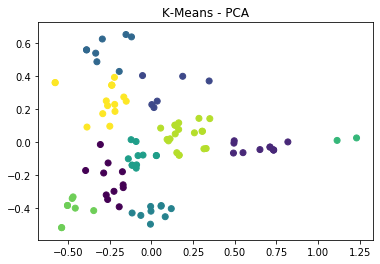

In [51]:
# Plot the solution.
plt.scatter(x_tfidf_test_pca[:, 0], x_tfidf_test_pca[:, 1], c=y_pred_kmeans_pca)
plt.title("K-Means - PCA")
plt.show()

# Normalized K-Mean Model

In [52]:
# Normalize the data.
x_tfidf_train_norm = normalize(x_tfidf_train)
x_tfidf_test_norm = normalize(x_tfidf_test)

kmeans_model.fit(x_tfidf_train_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [53]:
# Calculate predicted values.
y_pred_kmeans_norm = kmeans_model.fit_predict(x_tfidf_test_norm)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred_kmeans_norm, y_test))

ars_kmeans_norm = metrics.adjusted_rand_score(y_test, y_pred_kmeans_norm)
print("Adj Rand Score: {:.2}".format(ars_kmeans_norm))

Comparing k-means clusters against the data:
text_source  austen  bryant  burgess  carroll  chesterton  edgeworth  \
row_0                                                                  
0                 0       0       11        1           0          0   
1                 0       0        0        4           7          0   
2                 0       0        0        0           0         11   
3                 0       0        0        0           0          0   
4                 0       0        0        0           0          0   
5                 0       5        0        0           0          0   
6                 9       1        0        1           1          2   
7                 0       0        0        0           0          0   
8                 0       0        0        0           1          0   
9                 0       1        0        0           0          0   

text_source  melville  milton  shakespeare  whitman  
row_0                               

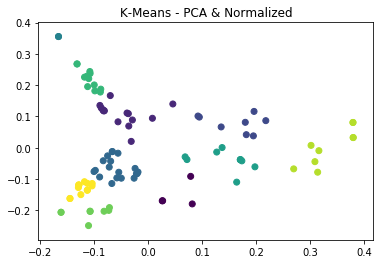

Adj Rand Score: 0.28


In [54]:
# Reduce it to two components.
x_norm_pca = PCA(2).fit_transform(x_tfidf_test_norm)

# Calculate predicted values.
y_pred_norm_pca = kmeans_model.fit_predict(x_norm_pca)

# Plot the solution.
plt.scatter(x_norm_pca[:, 0], x_norm_pca[:, 1], c=y_pred_norm_pca)
plt.title("K-Means - PCA & Normalized")
plt.show()

ars_kmeans_norm_pca = metrics.adjusted_rand_score(y_test, y_pred_norm_pca)
print("Adj Rand Score: {:.2}".format(ars_kmeans_norm_pca))

# Mean Shift Model

In [55]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Set the bandwidth. 
bandwidth = estimate_bandwidth(x_tfidf_train, quantile=0.2, n_samples=500)
print("Estimated Bandwidth: {}".format(bandwidth))

# Declare and fit the model.
meanshift_model = MeanShift(bandwidth=.94, bin_seeding=True)
meanshift_model.fit(x_tfidf_train)

# Extract cluster assignments for each data point.
labels = meanshift_model.labels_

# Coordinates of the cluster centers.
cluster_centers = meanshift_model.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
print('\n')
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

y_pred_meanshift = meanshift_model.predict(x_tfidf_test)

ars_meanshift = metrics.adjusted_rand_score(y_test, y_pred_meanshift)
print("Adj Rand Score: {:.2}".format(ars_meanshift))

Estimated Bandwidth: 1.3155701421285142
Number of estimated clusters: 10


Comparing the assigned categories to the ones in the data:
col_0         0   1   2   3   4   5   6  7  8  9
text_source                                     
austen       31   0   0   0   0   0   0  0  0  0
bryant       23   0   0   0   0   3   0  7  0  0
burgess       0   0  17   0   0   0  12  0  0  0
carroll      34   0   0   0   0   0   0  0  0  0
chesterton   31   0   0   0   0   0   0  0  0  0
edgeworth    26   0   0   0   0   0   0  1  0  0
melville     25   0   0   0   0   0   0  5  0  0
milton        0  28   0   0   0   0   0  0  0  0
shakespeare   0   0   0  18  10   0   0  0  1  1
whitman       0   0   0   1   5  20   0  1  0  0
Adj Rand Score: 0.26


In [56]:
# Reduce it to two components.
x_meanshift_pca = PCA(2).fit_transform(x_tfidf_train)

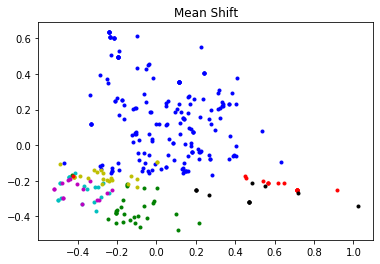

In [57]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
#    cluster_center = cluster_centers[k]
    plt.plot(x_meanshift_pca[my_members, 0], x_meanshift_pca[my_members, 1], col + '.')
#    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
#             markeredgecolor='k', markersize=14)
#plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.title("Mean Shift")
plt.show()

# Supervised Learning Models

# Random Forest

In [58]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier(random_state=1, class_weight = "balanced")

In [59]:
#tfidf
tfidf_train = rfc.fit(x_tfidf_train, y_train)

print('Training set score:', rfc.score(x_tfidf_train, y_train))
print('\nTest set score:', rfc.score(x_tfidf_test, y_test))

Training set score: 1.0

Test set score: 0.96


In [60]:
y_pred_rfc = rfc.predict(x_tfidf_test)

class_rep_rfc = classification_report(y_test, y_pred_rfc)

print(class_rep_rfc)

              precision    recall  f1-score   support

      austen       1.00      1.00      1.00         9
      bryant       0.78      1.00      0.88         7
     burgess       1.00      1.00      1.00        11
     carroll       1.00      1.00      1.00         6
  chesterton       1.00      1.00      1.00         9
   edgeworth       1.00      0.85      0.92        13
    melville       1.00      1.00      1.00        10
      milton       1.00      0.92      0.96        12
 shakespeare       1.00      0.90      0.95        10
     whitman       0.87      1.00      0.93        13

    accuracy                           0.96       100
   macro avg       0.96      0.97      0.96       100
weighted avg       0.97      0.96      0.96       100



# Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight = "balanced") 

In [62]:
#tfidf
tfidf_train = lr.fit(x_tfidf_train, y_train)

print('Training set score:', lr.score(x_tfidf_train, y_train))
print('\nTest set score:', lr.score(x_tfidf_test, y_test))

Training set score: 0.9933333333333333

Test set score: 0.99


In [63]:
y_pred_lr = lr.predict(x_tfidf_test)

class_rep_lr = classification_report(y_test, y_pred_lr)

print(class_rep_lr)

              precision    recall  f1-score   support

      austen       1.00      1.00      1.00         9
      bryant       1.00      1.00      1.00         7
     burgess       1.00      1.00      1.00        11
     carroll       1.00      1.00      1.00         6
  chesterton       1.00      1.00      1.00         9
   edgeworth       1.00      1.00      1.00        13
    melville       1.00      1.00      1.00        10
      milton       1.00      1.00      1.00        12
 shakespeare       0.91      1.00      0.95        10
     whitman       1.00      0.92      0.96        13

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



# Gradient Boosting

In [64]:
clf = ensemble.GradientBoostingClassifier()

In [65]:
#tfidf
tfidf_train = clf.fit(x_tfidf_train, y_train)

print('Training set score:', clf.score(x_tfidf_train, y_train))
print('\nTest set score:', clf.score(x_tfidf_test, y_test))

Training set score: 1.0

Test set score: 0.93


In [66]:
y_pred_clf = clf.predict(x_tfidf_test)

class_rep_clf = classification_report(y_test, y_pred_clf)

print(class_rep_clf)

              precision    recall  f1-score   support

      austen       1.00      1.00      1.00         9
      bryant       0.86      0.86      0.86         7
     burgess       1.00      1.00      1.00        11
     carroll       0.80      0.67      0.73         6
  chesterton       0.89      0.89      0.89         9
   edgeworth       0.86      0.92      0.89        13
    melville       0.90      0.90      0.90        10
      milton       1.00      0.92      0.96        12
 shakespeare       0.91      1.00      0.95        10
     whitman       1.00      1.00      1.00        13

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



# Evaluation of Models

In [67]:
from sklearn.model_selection import cross_val_score
import statistics

cvs_rfc = cross_val_score(rfc, x_tfidf_test, y_test, cv=3)
cvs_rfc = ["%.2f"%i for i in cvs_rfc]
cvs_rfc = list(map(float, cvs_rfc))

print('Random Forest Classifier')
print('Cross Validation Score: {}'.format(cvs_rfc))
print('Average: {0:.2f}'.format(statistics.mean(cvs_rfc)))

Random Forest Classifier
Cross Validation Score: [0.84, 0.84, 0.81]
Average: 0.83


In [68]:
cvs_lr = cross_val_score(lr, x_tfidf_test, y_test, cv=3)
cvs_lr = ["%.2f"%i for i in cvs_lr]
cvs_lr = list(map(float, cvs_lr))

print('Logistic Regression')
print('Cross Validation Score: {}'.format(cvs_lr))
print('Average: {0:.2f}'.format(statistics.mean(cvs_lr)))

Logistic Regression
Cross Validation Score: [0.89, 0.97, 0.87]
Average: 0.91


In [69]:
cvs_clf = cross_val_score(clf, x_tfidf_test, y_test, cv=3)
cvs_clf = ["%.2f"%i for i in cvs_clf]
cvs_clf = list(map(float, cvs_clf))

print('Gradient Boosting')
print('Cross Validation Score: {}'.format(cvs_clf))
print('Average: {0:.2f}'.format(statistics.mean(cvs_clf)))

Gradient Boosting
Cross Validation Score: [0.73, 0.81, 0.84]
Average: 0.79


# Unsupervised Learning Model

# Restricted Boltzmann Machine

In [70]:
logistic = linear_model.LogisticRegression(solver='newton-cg',
                                           tol=1,
                                           multi_class='multinomial'
                                          )

rbm = BernoulliRBM(#random_state=2,
                   #verbose=True
                  )

rbm_features_classifier = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

In [71]:
# Training RBM-Logistic Pipeline
rbm_features_classifier.fit(x_tfidf_train, y_train)

Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.1,
                              n_components=256, n_iter=10, random_state=None,
                              verbose=0)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='multinomial', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='newton-cg', tol=1, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [72]:
# Evaluation
y_pred_rbm = rbm_features_classifier.predict(x_tfidf_test)
class_rep_rbm = classification_report(y_test, y_pred_rbm)

print("Restricted Boltzmann Machine:")
print(class_rep_rbm)

Restricted Boltzmann Machine:
              precision    recall  f1-score   support

      austen       0.00      0.00      0.00         9
      bryant       0.00      0.00      0.00         7
     burgess       0.00      0.00      0.00        11
     carroll       0.06      1.00      0.11         6
  chesterton       0.00      0.00      0.00         9
   edgeworth       0.00      0.00      0.00        13
    melville       0.00      0.00      0.00        10
      milton       0.00      0.00      0.00        12
 shakespeare       0.00      0.00      0.00        10
     whitman       0.00      0.00      0.00        13

    accuracy                           0.06       100
   macro avg       0.01      0.10      0.01       100
weighted avg       0.00      0.06      0.01       100



/Users/Kevin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


***
# <font color='blue'> Using Unsupervised features within Models</font>

# <font color='blue'> Clustering Models - LSA</font>

# <font color='blue'>K-Mean Model</font>

In [73]:
kmeans_model.fit(x_lsa_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [74]:
# Calculate predicted values.
y_pred_kmeans_lsa = kmeans_model.fit_predict(x_lsa_test)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred_kmeans_lsa, y_test))

ars_kmeans_lsa = metrics.adjusted_rand_score(y_test, y_pred_kmeans_lsa)
print("Adj Rand Score: {:.2}".format(ars_kmeans_lsa))

Comparing k-means clusters against the data:
text_source  austen  bryant  burgess  carroll  chesterton  edgeworth  \
row_0                                                                  
0                 0       0        0        0           0          0   
1                 1       4        0        1           1          5   
2                 0       2        0        0           0          0   
3                 0       0        0        0           8          0   
4                 0       0        0        0           0          0   
5                 0       0        0        0           0          0   
6                 8       0        0        0           0          3   
7                 0       1        0        0           0          0   
8                 0       0       11        0           0          0   
9                 0       0        0        5           0          5   

text_source  melville  milton  shakespeare  whitman  
row_0                               

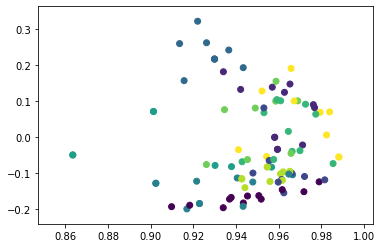

In [75]:
# Plot the solution.
plt.scatter(x_lsa_test[:, 0], x_lsa_test[:, 1], c=y_pred_kmeans_lsa)
plt.show()

# <font color='blue'>Normalized K-Mean Model</font>

In [76]:
# Normalize the data.
x_lsa_train_norm = normalize(x_lsa_train)
x_lsa_test_norm = normalize(x_lsa_test)

In [77]:
kmeans_model.fit(x_lsa_train_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [78]:
# Calculate predicted values.
y_pred_kmeans_norm_lsa = kmeans_model.fit_predict(x_lsa_test_norm)

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred_kmeans_norm_lsa, y_test))

ars_kmeans_norm_lsa = metrics.adjusted_rand_score(y_test, y_pred_kmeans_norm_lsa)
print("Adj Rand Score: {:.2}".format(ars_kmeans_norm_lsa))

Comparing k-means clusters against the data:
text_source  austen  bryant  burgess  carroll  chesterton  edgeworth  \
row_0                                                                  
0                 0       0        0        0           0          0   
1                 1       4        0        1           1          5   
2                 0       2        0        0           0          0   
3                 0       0        0        0           8          0   
4                 0       0        0        0           0          0   
5                 0       0        0        0           0          0   
6                 8       0        0        0           0          3   
7                 0       1        0        0           0          0   
8                 0       0       11        0           0          0   
9                 0       0        0        5           0          5   

text_source  melville  milton  shakespeare  whitman  
row_0                               

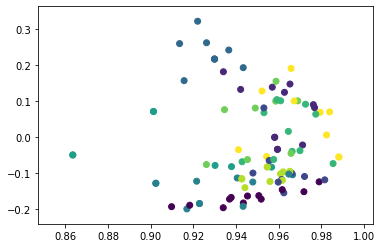

In [79]:
# Plot the solution.
plt.scatter(x_lsa_test[:, 0], x_lsa_test[:, 1], c=y_pred_kmeans_norm_lsa)
plt.show()

# <font color='blue'>Mean Shift Model</font>

In [80]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Set the bandwidth. 
bandwidth = estimate_bandwidth(x_lsa_train, quantile=0.2, n_samples=500)
print("Estimated Bandwidth: {}".format(bandwidth))

# Declare and fit the model.
meanshift_model = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_model.fit(x_lsa_train)

# Extract cluster assignments for each data point.
labels = meanshift_model.labels_

# Coordinates of the cluster centers.
cluster_centers = meanshift_model.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))
print('\n')
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

y_pred_meanshift_lsa = meanshift_model.predict(x_lsa_test)

ars_meanshift_lsa = metrics.adjusted_rand_score(y_test, y_pred_meanshift_lsa)
print("Adj Rand Score: {:.2}".format(ars_meanshift_lsa))

Estimated Bandwidth: 0.38524395481686197
Number of estimated clusters: 1


Comparing the assigned categories to the ones in the data:
col_0         0
text_source    
austen       31
bryant       33
burgess      29
carroll      34
chesterton   31
edgeworth    27
melville     30
milton       28
shakespeare  30
whitman      27
Adj Rand Score: 0.0


# <font color='blue'>Supervised Learning Models - LSA</font>

# <font color='blue'>Random Forest</font>

In [81]:
from sklearn import ensemble

rfc = ensemble.RandomForestClassifier(random_state=1, class_weight = "balanced")

In [82]:
#tfidf
lsa_train = rfc.fit(x_lsa_train, y_train)

print('Training set score:', rfc.score(x_lsa_train, y_train))
print('\nTest set score:', rfc.score(x_lsa_test, y_test))

Training set score: 0.9933333333333333

Test set score: 0.91


In [83]:
y_pred_rfc_lsa = rfc.predict(x_lsa_test)

class_rep_rfc_lsa = classification_report(y_test, y_pred_rfc_lsa)

print(class_rep_rfc_lsa)

              precision    recall  f1-score   support

      austen       1.00      1.00      1.00         9
      bryant       1.00      1.00      1.00         7
     burgess       1.00      1.00      1.00        11
     carroll       0.71      0.83      0.77         6
  chesterton       0.80      0.89      0.84         9
   edgeworth       1.00      0.85      0.92        13
    melville       0.89      0.80      0.84        10
      milton       1.00      0.92      0.96        12
 shakespeare       0.77      1.00      0.87        10
     whitman       0.92      0.85      0.88        13

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



# <font color='blue'>Logistic Regression</font>

In [84]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight = "balanced") 

In [85]:
#lsa
lsa_train = lr.fit(x_lsa_train, y_train)

print('Training set score:', lr.score(x_lsa_train, y_train))
print('\nTest set score:', lr.score(x_lsa_test, y_test))

Training set score: 0.91

Test set score: 0.91


In [86]:
y_pred_lr_lsa = lr.predict(x_lsa_test)

class_rep_lr_lsa = classification_report(y_test, y_pred_lr_lsa)

print(class_rep_lr_lsa)

              precision    recall  f1-score   support

      austen       0.69      1.00      0.82         9
      bryant       0.78      1.00      0.88         7
     burgess       1.00      1.00      1.00        11
     carroll       1.00      0.83      0.91         6
  chesterton       0.89      0.89      0.89         9
   edgeworth       0.89      0.62      0.73        13
    melville       1.00      0.90      0.95        10
      milton       1.00      1.00      1.00        12
 shakespeare       0.91      1.00      0.95        10
     whitman       1.00      0.92      0.96        13

    accuracy                           0.91       100
   macro avg       0.92      0.92      0.91       100
weighted avg       0.92      0.91      0.91       100



# <font color='blue'>Gradient Boosting<font>

In [87]:
clf = ensemble.GradientBoostingClassifier()

In [88]:
#lsa
lsa_train = clf.fit(x_lsa_train, y_train)

print('Training set score:', clf.score(x_lsa_train, y_train))
print('\nTest set score:', clf.score(x_lsa_test, y_test))

Training set score: 1.0

Test set score: 0.88


In [89]:
y_pred_clf_lsa = clf.predict(x_lsa_test)

class_rep_clf_lsa = classification_report(y_test, y_pred_clf_lsa)

print(class_rep_clf_lsa)

              precision    recall  f1-score   support

      austen       1.00      1.00      1.00         9
      bryant       0.78      1.00      0.88         7
     burgess       1.00      0.73      0.84        11
     carroll       0.67      0.67      0.67         6
  chesterton       0.90      1.00      0.95         9
   edgeworth       0.82      0.69      0.75        13
    melville       1.00      0.90      0.95        10
      milton       0.92      1.00      0.96        12
 shakespeare       0.91      1.00      0.95        10
     whitman       0.79      0.85      0.81        13

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.88      0.88       100



# <font color='blue'>Evaluation of Models</font>

In [90]:
from sklearn.model_selection import cross_val_score
import statistics

cvs_rfc_lsa = cross_val_score(rfc, x_lsa_test, y_test, cv=3)
cvs_rfc_lsa = ["%.2f"%i for i in cvs_rfc_lsa]
cvs_rfc_lsa = list(map(float, cvs_rfc_lsa))

print('Random Forest Classifier')
print('Cross Validation Score: {}'.format(cvs_rfc_lsa))
print('Average: {0:.2f}'.format(statistics.mean(cvs_rfc_lsa)))

Random Forest Classifier
Cross Validation Score: [0.86, 0.91, 0.81]
Average: 0.86


In [91]:
cvs_lr_lsa = cross_val_score(lr, x_lsa_test, y_test, cv=3)
cvs_lr_lsa = ["%.2f"%i for i in cvs_lr_lsa]
cvs_lr_lsa = list(map(float, cvs_lr_lsa))

print('Logistic Regression')
print('Cross Validation Score: {}'.format(cvs_lr_lsa))
print('Average: {0:.2f}'.format(statistics.mean(cvs_lr_lsa)))

Logistic Regression
Cross Validation Score: [0.92, 0.88, 0.87]
Average: 0.89


In [92]:
cvs_clf_lsa = cross_val_score(clf, x_lsa_test, y_test, cv=3)
cvs_clf_lsa = ["%.2f"%i for i in cvs_clf_lsa]
cvs_clf_lsa = list(map(float, cvs_clf_lsa))

print('Gradient Boosting')
print('Cross Validation Score: {}'.format(cvs_clf_lsa))
print('Average: {0:.2f}'.format(statistics.mean(cvs_clf_lsa)))

Gradient Boosting
Cross Validation Score: [0.81, 0.69, 0.65]
Average: 0.72


# <font color='blue'>Unsupervised Learning Model</font>

In [93]:
logistic = linear_model.LogisticRegression(#solver='newton-cg',
                                           #tol=1,
                                           #multi_class='multinomial'
                                          )

rbm = BernoulliRBM(random_state=2,
                   verbose=True
                  )

rbm_features_classifier_lsa = Pipeline(
    steps=[('rbm', rbm), ('logistic', logistic)])

In [94]:
# Training RBM-Logistic Pipeline
rbm_features_classifier_lsa.fit(x_lsa_train, y_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -0.11, time = 0.01s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -0.08, time = 0.02s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -0.08, time = 0.02s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -0.10, time = 0.03s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -0.09, time = 0.02s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -0.12, time = 0.02s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -0.10, time = 0.02s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -0.09, time = 0.02s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -0.03, time = 0.02s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -0.09, time = 0.02s


Pipeline(memory=None,
         steps=[('rbm',
                 BernoulliRBM(batch_size=10, learning_rate=0.1,
                              n_components=256, n_iter=10, random_state=2,
                              verbose=True)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [95]:
# Evaluation
y_pred_rbm_lsa = rbm_features_classifier_lsa.predict(x_lsa_test)
class_rep_rbm_lsa = classification_report(y_test, y_pred_rbm_lsa)

print("Restricted Boltzmann Machine:")
print(class_rep_rbm_lsa)

Restricted Boltzmann Machine:
              precision    recall  f1-score   support

      austen       0.00      0.00      0.00         9
      bryant       0.04      0.14      0.06         7
     burgess       0.00      0.00      0.00        11
     carroll       0.08      1.00      0.15         6
  chesterton       0.00      0.00      0.00         9
   edgeworth       0.00      0.00      0.00        13
    melville       0.00      0.00      0.00        10
      milton       0.00      0.00      0.00        12
 shakespeare       0.00      0.00      0.00        10
     whitman       0.00      0.00      0.00        13

    accuracy                           0.07       100
   macro avg       0.01      0.11      0.02       100
weighted avg       0.01      0.07      0.01       100



/Users/Kevin/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Score Comparison 

In [96]:
# Classification Report for supervised models - TF-IDF
print('Classification Reports - TF-IDF:')
print('\n')
print('Random forest classifier:')
print(class_rep_rfc)
print('\n')
print('Logistic regression classifier:')
print(class_rep_lr)
print('\n')
print('Gradient Boosting:')
print(class_rep_clf)

Classification Reports - TF-IDF:


Random forest classifier:
              precision    recall  f1-score   support

      austen       1.00      1.00      1.00         9
      bryant       0.78      1.00      0.88         7
     burgess       1.00      1.00      1.00        11
     carroll       1.00      1.00      1.00         6
  chesterton       1.00      1.00      1.00         9
   edgeworth       1.00      0.85      0.92        13
    melville       1.00      1.00      1.00        10
      milton       1.00      0.92      0.96        12
 shakespeare       1.00      0.90      0.95        10
     whitman       0.87      1.00      0.93        13

    accuracy                           0.96       100
   macro avg       0.96      0.97      0.96       100
weighted avg       0.97      0.96      0.96       100



Logistic regression classifier:
              precision    recall  f1-score   support

      austen       1.00      1.00      1.00         9
      bryant       1.00      1.00    

In [97]:
# Classification Report for supervised models - LSA
print('Classification Reports - LSA:')
print('\n')
print('Random forest classifier - LSA:')
print(class_rep_rfc_lsa)
print('\n')
print('Logistic regression classifier - LSA:')
print(class_rep_lr_lsa)
print('\n')
print('Gradient Boosting - LSA:')
print(class_rep_clf_lsa)

Classification Reports - LSA:


Random forest classifier - LSA:
              precision    recall  f1-score   support

      austen       1.00      1.00      1.00         9
      bryant       1.00      1.00      1.00         7
     burgess       1.00      1.00      1.00        11
     carroll       0.71      0.83      0.77         6
  chesterton       0.80      0.89      0.84         9
   edgeworth       1.00      0.85      0.92        13
    melville       0.89      0.80      0.84        10
      milton       1.00      0.92      0.96        12
 shakespeare       0.77      1.00      0.87        10
     whitman       0.92      0.85      0.88        13

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



Logistic regression classifier - LSA:
              precision    recall  f1-score   support

      austen       0.69      1.00      0.82         9
      bryant       0.78     

Comparing between the supervised models, the models that just use the TF-IDF scores perform better than the LSA features. 

In [98]:
# Classification Report for unsupervised models - TF-IDF
print('Classification Reports - TF-IDF:')
print('\n')
print('Restricted Boltzmann Machine:')
print(class_rep_rbm)
print('\n')

# Classification Report for unsupervised models - LSA
print('Classification Reports - LSA:')
print('\n')
print('Restricted Boltzmann Machine:')
print(class_rep_rbm_lsa)

Classification Reports - TF-IDF:


Restricted Boltzmann Machine:
              precision    recall  f1-score   support

      austen       0.00      0.00      0.00         9
      bryant       0.00      0.00      0.00         7
     burgess       0.00      0.00      0.00        11
     carroll       0.06      1.00      0.11         6
  chesterton       0.00      0.00      0.00         9
   edgeworth       0.00      0.00      0.00        13
    melville       0.00      0.00      0.00        10
      milton       0.00      0.00      0.00        12
 shakespeare       0.00      0.00      0.00        10
     whitman       0.00      0.00      0.00        13

    accuracy                           0.06       100
   macro avg       0.01      0.10      0.01       100
weighted avg       0.00      0.06      0.01       100



Classification Reports - LSA:


Restricted Boltzmann Machine:
              precision    recall  f1-score   support

      austen       0.00      0.00      0.00         9
   

In [99]:
print('Clustering Evaluation')
print('\n')

print('Adj Rand Score - TFIDF:')
print("Kmeans: {:.2}".format(ars_kmeans))
print("Kmeans - PCA: {:.2}".format(ars_kmeans_pca))
print("Kmeans - Norm: {:.2}".format(ars_kmeans_norm))
print("Mean Shift: {:.2}".format(ars_meanshift))
print('\n')

print('Adj Rand Score - LSA:')
print("Kmeans: {:.2}".format(ars_kmeans_lsa))
print("Kmeans - Norm: {:.2}".format(ars_kmeans_norm_lsa))
print("Mean Shift: {:.2}".format(ars_meanshift_lsa))

Clustering Evaluation


Adj Rand Score - TFIDF:
Kmeans: 0.65
Kmeans - PCA: 0.37
Kmeans - Norm: 0.62
Mean Shift: 0.26


Adj Rand Score - LSA:
Kmeans: 0.64
Kmeans - Norm: 0.64
Mean Shift: 0.0
